In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [4]:
len(df)

82657

In [5]:
df.columns # Viewing the columns in the dataset

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery', 'variety'],
      dtype='object')

In [6]:
df.isnull().sum() #Checkig for empty records in the dataset

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

user_name             0
country               0
review_title          0
review_description    0
designation           0
points                0
price                 0
province              0
region_1              0
region_2              0
winery                0
variety               0
dtype: int64

In [9]:
# Viewing datatype of each item in dataset
for name,dtype in df.dtypes.iteritems():
    print(name,end=" ")
    print(dtype)

user_name object
country object
review_title object
review_description object
designation object
points int64
price float64
province object
region_1 object
region_2 object
winery object
variety object


In [10]:
df['price']=df['price'].fillna(value=df['price'].mean())

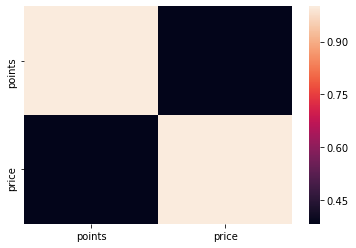

In [11]:
sns.heatmap(df.corr())

In [12]:
df.describe()

,points,price
count,15986.000000,15986.000000
mean,89.591080,42.608908
std,2.839882,31.293712
min,80.000000,4.000000
25%,88.000000,25.000000
50%,90.000000,38.000000
75%,92.000000,50.000000
max,100.000000,2013.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15986 entries, 6 to 82642
Data columns (total 12 columns):
user_name             15986 non-null object
country               15986 non-null object
review_title          15986 non-null object
review_description    15986 non-null object
designation           15986 non-null object
points                15986 non-null int64
price                 15986 non-null float64
province              15986 non-null object
region_1              15986 non-null object
region_2              15986 non-null object
winery                15986 non-null object
variety               15986 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 1.6+ MB


# MODEL TRAINING


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize

In [59]:
sns.set(style='whitegrid')

In [60]:
stopwords=set(stopwords.words('english'))

In [61]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [62]:
detokenizer=TreebankWordDetokenizer()

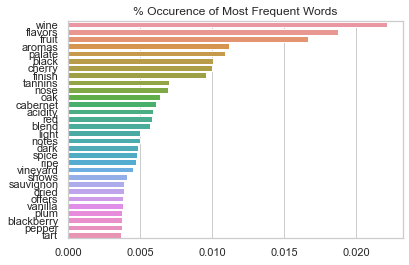

In [63]:
def clean_description(desc):
    desc=word_tokenize(desc.lower())
    desc=[token for token in desc if token not in stopwords and token.isalpha()]
    return detokenizer.detokenize(desc)

df['cleaned_description']=df['review_description'].apply(clean_description)

word_occurence=df['cleaned_description'].str.split(expand=True).stack().value_counts()

total_words=sum(word_occurence)

#Plotting common words
plt.tight_layout()
top_words=word_occurence[:30]/total_words

ax=sns.barplot(x=top_words.values,y=top_words.index)

#Setting title
ax.set_title('% Occurence of Most Frequent Words')

plt.show()

In [64]:
df['points'].unique()

array([ 91,  90,  92,  88,  84,  87,  93,  89,  94,  86,  95,  85,  83,
        97,  82,  81, 100,  80,  96,  98,  99], dtype=int64)

In [66]:
def points_to_class(points):
    if points in range(80,83):
        return 0
    elif points in range(83,87):
        return 1
    elif points in range(87,90):
        return 2
    elif points in range(90,94):
        return 3
    elif points in range(94,98):
        return 4
    else:
        return 5
df['rating']=df['points'].apply(points_to_class)
    

In [68]:
df.head(1)

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety,cleaned_description,rating
6,@wawinereport,US,Gordon Estate 2012 Tradition Red (Columbia Val...,"Half Syrah and half Cabernet Sauvignon, with 4...",Tradition,91,45.0,Washington,Columbia Valley (WA),Columbia Valley,Gordon Estate,Red Blend,half syrah half cabernet sauvignon new french ...,3


In [72]:
df.groupby('rating')['points'].sum()

rating
0     11504
1    178872
2    437350
3    695053
4    107458
5      1966
Name: points, dtype: int64

In [84]:
num_classes=6
embedding_dim=300
epochs=60
batch_size=100
max_len=100

class_weights={
    0:7,
    1:1,
    2:1,
    3:1,
    4:1,
    5:7
    
}

In [76]:
import numpy as np
import pandas as pd

from keras.models import Model,load_model
from keras.layers import Dense,Embedding,Input,Activation,CuDNNGRU,Bidirectional,Dropout,GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping,ModelCheckpoint,Callback

Using TensorFlow backend.


In [78]:
# One Hot Encode target

def onehot(arr,num_class):
    return np.eye(num_class)[np.array(arr.astype(int)).reshape(-1)]

y=onehot(df['rating'],num_classes)

In [79]:
# Train validation split

from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(df['review_description'],y,test_size=0.05)

In [85]:
# Prepare embeddings 
# Embedding file not contained in repo. Download from https://nlp.stanford.edu/projects/glove/
# I am using glove.840B.300d.zip

embeddings_index = {}

# Read pre-trained word vectors and populate to dictionary
f = open("glove.840B.300d.txt", encoding = "utf8")

for line in f:
    values = line.split()
    word = ''.join(values[:-embedding_dim])
    coefs = np.asarray(values[-embedding_dim:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
    
# train tokenizer 
tokenizer = Tokenizer(num_words = None)
tokenizer.fit_on_texts(X_train)

# fit tokenizer
sequences_train = tokenizer.texts_to_sequences(X_train)

# Padding any short sequences with 0s
X_train = pad_sequences(sequences_train, maxlen=max_len)

sequences_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(sequences_val, maxlen = max_len)

word_index = tokenizer.word_index
                
# create embedding layer 
# We can designate "Out of Vocabulary" word vectors here 
# In this case, they are initialized to zero vector
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
        
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [ ]:
embedding_layer = Embedding(len(word_index) + 1, embedding_dim, weights = [embedding_matrix], input_length = max_len, trainable = False) 
a= Input(shape=(max_len, ), dtype = 'int32')
embedded_sequences = embedding_layer(a) 
x = Bidirectional(CuDNNGRU(50, return_sequences=True))(embedded_sequences)
x = GlobalMaxPooling1D()(x)
x = Dense(50, activation = 'relu')(x)
x = Dropout(0.1)(x)
output = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=a, outputs=output)
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
        
checkpoint = ModelCheckpoint("model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
callback = [checkpoint, early]
        
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), callbacks=callback, class_weight = class_weights)


In [ ]:

from sklearn.metrics import accuracy_score

test = pd.read_csv("test.csv", index_col = False)
test["rating"] = test["points"].apply(points_to_class)

sequences_test = tokenizer.texts_to_sequences(test["description"])
X_test = pad_sequences(sequences_test, maxlen=max_len)

# Predictions
pred_test = model.predict(X_test)
pred_test = [np.argmax(x) for x in pred_test]

# Actual
true_test = onehot(test["rating"], num_class)
true_test = [np.argmax(x) for x in true_test]

# Find accuracies
accuracy = accuracy_score(true_test, pred_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_test, pred_test)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

class_name = ["Acceptable", "Good", "Very Good", "Excellent", "Superb/Classic"]
plt.colorbar()
tick_marks = np.arange(len(class_name))
plt.xticks(tick_marks, class_name, rotation=45)
plt.yticks(tick_marks, class_name)

plt.show()

